# Johanes Andrian Kartono 03729894

<h3> Answers to Analysis and General Questions </h3>
<h4> Task 1.6.1: Event-based Simulator </h4>

Why is it feasible to use Next-Event Time Advance simulator and not Fixed-Increment Time
Advance simulator for the considered system? Give at least one example when utilizing Next Event Time Advance would not be efficient or possible?

> In our system next-event time advance simulator is the best option as we know that the system states remain constant until the next event happens and the events happen with a reasonable frequency. On the other hand fixed-increment time advance is not feasible because state changes does not occur in fixed time intervals but happens randomly (as specified by the task: distributed uniformly) within a time interval. This means that if we used fixed-increment time advance, certain events will not occur at the exact time. 
>
> It is of course possible to reduce the time increment to a really small one and obtain similar results to the next-event time advance simulator but this will need a lot of computational power which is completely inefficient as we don't always know the frequency of events (think events happening at rate of 50s^-1 but the increment is per 1 ms) and might waste the computational power.
>
> An example case where next-event time advance simulator is not feasible is when the frequency of events are really high or in a continuous fashion (e.g. network telemetry). High frequency events would also mean a high requirement of computational power --> there might not be enough resource to process everything. Here a fixed-increment time advance simulator can be used to reduce the amount of performance required.

<h4> Task 1.6.2: Event Chain Structure </h4>

Explain why it makes sense to use a heap as your data structure for the event chain instead of other data structures.

>A heap is useful as it gives quick access to the largest/smallest element of the data structure. This feature is especially useful since we are always taking the highest priority element in the heap which depending on implementation is located at either ends of the heap. Another feature that is interesting regarding the heap is that other than the highest priority element, it is only partially sorted which makes insertion fast but this is not a reason to pick heap here.

<h4>Task 1.6.3: Emergency Termination</h4>

In your implementation, the simulation is terminated upon the processing of the SimulationTermination event according to its timestamp. Imagine you would like to include another event
called EmergencyTermination defined as follows:

```python
class EmergencyTermination(SimEvent):
"""
Defines the emergency termination of a simulation.
"""
def __init__(self, sim, timestamp):
"""
Create an emergency simulation termination event
independent of the execution time.
Order of an emergency simulation termination
event is set to the flag "Emergency"
"""
super(EmergencyTermination, self).__init__(sim, timestamp)
self.order = "Emergency"
```

Upon the insertion of the EmergencyTermination event to the event chain, the simulation
should stop immediately independent of EmergencyTermination timestamp and the current simulation time. Using the ”Emergency” flag set to the order attribute, how would you modify
the __lt__() method of SimEvent, such that the EventChain processes the EmergencyTermination event according to the specified functionality?

>The basic idea of the change is that values with the order attribute "Emergency" now needs to have the highest priority in the heap (i.e. it needs to be sorted as the smallest element). There are multiple ways how to implement this but the simplest idea would probably be using an if clause inside the \_\_lt__() function
>
```python
def __lt__():
    if self.order == "Emergency":
        return True

    # previous implementation
    if self.timestamp == other.timestamp:
        return self.order < other.order
    else:
        return self.timestamp < other.timestamp
```
>
>this way the code exits directly and return true if the string "Emergency" is found. Otherwise it will continue with the previous implementation of \_\_lt__(). One thing to note is that a string cannot be compared to an integer and this special case therefore needs to watched out for.

<h3> Simulation Study 1 </h3>
<h4> Task 1.7.1: Utilization Determination I </h4>

Find out what is the maximum utilization ρ =λ/µ that the system with S = 4 can handle such that after 100 s, less than 5 packets are lost in at least 95% of 1000 simulation runs. Keep the service rate default, i.e., µ = 0.0015. and vary arrival rate λ. Determine ρ to the precision of two decimal places (i.e., in the format x.xx). Describe your idea how to design the simulation runs to achieve this goal. Think about cases, when you are close to fulfilling or not fulfilling the requirements and how you could assure a correct result in these cases.

> An initial thought is to basically execute the simulation run for different parameters and brute force it. However it is definitely better to make an educated guess to shorten the amount of time required for simulating. The method that I will execute is to find the answer per order of magnitude (i.e. search for the 0.1th place of utilization and then find the next decimal place). Since utilization cannot be bigger than 1 (unless we want a lossy system), we can safely assume that the answer is between 0.01 and 0.99 (0.00 is excluded since it doesn't make sense to simulate)

In [1]:
from simstudy1 import task_1_7_1_1

task_1_7_1_1()

Utilization Rate = 0.01 | 1000 successes out of 1000 runs 
Utilization Rate = 0.02 | 1000 successes out of 1000 runs 
Utilization Rate = 0.03 | 1000 successes out of 1000 runs 
Utilization Rate = 0.04 | 1000 successes out of 1000 runs 
Utilization Rate = 0.05 | 1000 successes out of 1000 runs 
Utilization Rate = 0.06 | 1000 successes out of 1000 runs 
Utilization Rate = 0.07 | 1000 successes out of 1000 runs 
Utilization Rate = 0.08 | 1000 successes out of 1000 runs 
Utilization Rate = 0.09 | 1000 successes out of 1000 runs 
Utilization Rate = 0.1 | 1000 successes out of 1000 runs 
Utilization Rate = 0.11 | 1000 successes out of 1000 runs 
Utilization Rate = 0.12 | 1000 successes out of 1000 runs 
Utilization Rate = 0.13 | 1000 successes out of 1000 runs 
Utilization Rate = 0.14 | 1000 successes out of 1000 runs 
Utilization Rate = 0.15 | 1000 successes out of 1000 runs 
Utilization Rate = 0.16 | 1000 successes out of 1000 runs 
Utilization Rate = 0.17 | 1000 successes out of 1000 runs

> as can be seen from the output above, the limit is around 0.85 to 0.9 utilization rate (+- 30 successes from target=950). It is definitely possible that the output of the simulation have some deviation such as in this example run
>
> Utilization Rate = 0.86 | 972 successes out of 1000 runs 
> Utilization Rate = 0.87 | 938 successes out of 1000 runs 
> Utilization Rate = 0.88 | 960 successes out of 1000 runs 
>
> A possible solution to assure a correct result in this case is to run the simulation multiple times specifically to the feasible range of utilization rate (0.85-0.9) and use the average as the de facto result of the simulation. In my case, I will use 10 as the number of times to repeat the simulation but ideally the simulation is run for a large number of times before taking the average (ideal case n = infinite).

In [2]:
from simstudy1 import task_1_7_1_2

task_1_7_1_2(85,91)

Utilization Rate = 0.85 | 974.5 successes out of 1000 runs 
Utilization Rate = 0.86 | 968.8 successes out of 1000 runs 
Utilization Rate = 0.87 | 956.2 successes out of 1000 runs 
Utilization Rate = 0.88 | 947.5 successes out of 1000 runs 
Utilization Rate = 0.89 | 930.8 successes out of 1000 runs 
Utilization Rate = 0.9 | 910.1 successes out of 1000 runs 


> From the result above, we can confirm that 0.87 is the maximum utilization rate that we can use to reach stated conditions
>
> A small note is that here I use average on the number of successes from 1000 simulation run. An alternative way is to set a threshold where you expect for example at least 8 out the 10 retries to have success above 950. This method should also work fine since in our case the deviation is not extreme between every simulation with the same parameters

<h4>Task 1.7.2: Offered Traffic Determination II</h4>

Which ρ will you get if you change µ to 0.015 and want to have less than 50 dropped packets in 95% of the cases? Describe your observations!

In [3]:
from simstudy1 import task_1_7_2_1
task_1_7_2_1()

Utilization Rate = 0.01 | 1000 successes out of 1000 runs 
Utilization Rate = 0.02 | 1000 successes out of 1000 runs 
Utilization Rate = 0.03 | 1000 successes out of 1000 runs 
Utilization Rate = 0.04 | 1000 successes out of 1000 runs 
Utilization Rate = 0.05 | 1000 successes out of 1000 runs 
Utilization Rate = 0.06 | 1000 successes out of 1000 runs 
Utilization Rate = 0.07 | 1000 successes out of 1000 runs 
Utilization Rate = 0.08 | 1000 successes out of 1000 runs 
Utilization Rate = 0.09 | 1000 successes out of 1000 runs 
Utilization Rate = 0.1 | 1000 successes out of 1000 runs 
Utilization Rate = 0.11 | 1000 successes out of 1000 runs 
Utilization Rate = 0.12 | 1000 successes out of 1000 runs 
Utilization Rate = 0.13 | 1000 successes out of 1000 runs 
Utilization Rate = 0.14 | 1000 successes out of 1000 runs 
Utilization Rate = 0.15 | 1000 successes out of 1000 runs 
Utilization Rate = 0.16 | 1000 successes out of 1000 runs 
Utilization Rate = 0.17 | 1000 successes out of 1000 runs

In [4]:
from simstudy1 import task_1_7_2_2

task_1_7_2_2(95,98)

Utilization Rate = 0.9500000000000001 | 979.9 successes out of 1000 runs 
Utilization Rate = 0.96 | 949.9 successes out of 1000 runs 
Utilization Rate = 0.97 | 875 successes out of 1000 runs 


> An observation is that the simulation time increased. This makes sense as the number of events increased when we increase the service rate. The arrival rate that is designed as a percentage of the service rate would increase proportionally. 
>
> Regarding the result it can be seen that the maximum utilization rate for 50 dropped packets in 95% of the cases is around 95% to 97% which is a really high utilization rate. The high utilization rate can be attributed to the high tolerance of the system (50 dropped packet) that is defined in the task description. After using the average, we found out that the maximum of the system is located at 95% as 96% have less than 95% rate of success.

<h4>Task 1.7.3: Comparison of Results</h4>

Compare the results of task 1.7.1 and task 1.7.2. Does the system behave differently or not? Explain your observations! Hint: Think about the distribution of the blocking probability per run. Possible solution: Plotting cumulative distribution functions of the blocking probabilities might be helpful.

> Implementation: Set the service rate for graph 1 to 0.0015 and the other one to 0.015. The blocking probability will be on the x axis and the cdf will be the y axis.
To get the distribution, we will run the simulation 100 times, save the result in a list and then generate the cdf.
>
> Result: The result is that we have a smoother curve for the second system. At a glance, the system looks different but if we analyze the probability distributions of both curve, the first curve look like a discrete uniform distribution and the second one looks like a continuous uniform distribution function. This is interesting because we can see that they have similar distribution only that one is discrete and the other is uniform.
> A possible interpretation/reason for this difference is the order of the system (10^-3 vs 10^-4). The plot is better suited for a higher magnitude and there are values in between the "bins" (caused by np.linspace) which cannot be expressed properly as we used frequency count when generating the plot. If we create a more accurate plot, then it might be possible that the two system will show similar distribution with different standard deviation/variance.

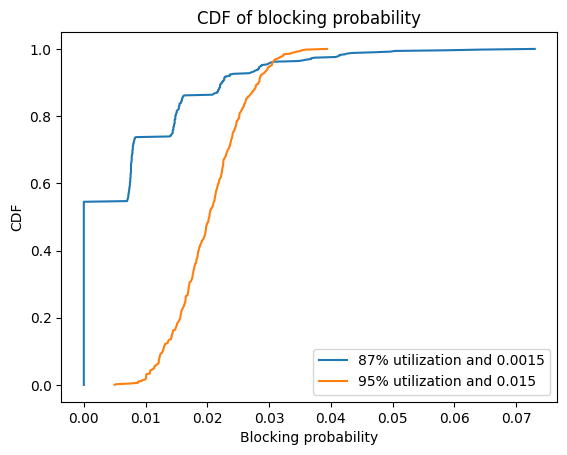

In [1]:
from simstudy1 import task_1_7_3

task_1_7_3()